In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [2]:
# Load and preprocess the dataset
def load_data(csv_file):
    data = pd.read_csv(r'/Users/purplerain/Desktop/FaLsE ArT/fer2013.csv')
    # Extract images and labels
    images = data['pixels'].apply(lambda x: np.fromstring(x, sep=' ').reshape(48, 48, 1))
    labels = data['emotion']
    return np.array(list(images)), np.array(labels)

In [3]:
# Preprocess the data
def preprocess_data(images, labels):
    # Normalize images
    images = images.astype('float32') / 255.0
    # Convert labels to one-hot encoding
    labels = to_categorical(labels)
    return images, labels

In [4]:
# Load the dataset
csv_file = '/Users/purplerain/Desktop/FaLsE ArT/fer2013.csv'  # Replace with the path to your dataset
images, labels = load_data(csv_file)

In [5]:

# Preprocess the data
images, labels = preprocess_data(images, labels)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:


# Build the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

Epoch 1/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.2687 - loss: 1.7867 - val_accuracy: 0.4263 - val_loss: 1.4938
Epoch 2/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.4320 - loss: 1.4683 - val_accuracy: 0.4918 - val_loss: 1.3406
Epoch 3/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5008 - loss: 1.3116 - val_accuracy: 0.5218 - val_loss: 1.2673
Epoch 4/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - accuracy: 0.5379 - loss: 1.2203 - val_accuracy: 0.5395 - val_loss: 1.2197
Epoch 5/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.5650 - loss: 1.1421 - val_accuracy: 0.5535 - val_loss: 1.1980
Epoch 6/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5963 - loss: 1.0693 - val_accuracy: 0.5667 - val_loss: 1.1559
Epoch 7/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.6221 - loss: 0.9991 - val_accuracy: 0.5646 - val_loss: 1.1555
Epoch 8/30
404/404 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.6449 - loss: 0.9442 - 

In [10]:
# Save the model
model.save('/Users/purplerain/Desktop/emotion_model.h5')

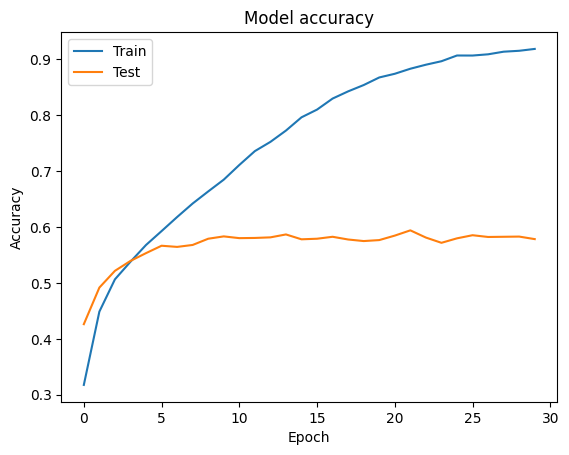

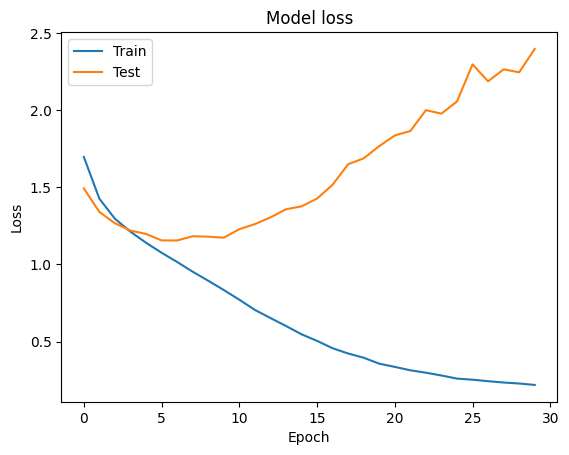

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [13]:
%pip install face_recognition


  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached dlib-19.24.6-cp312-cp312-macosx_14_0_universal2.whl
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import cv2
import numpy as np
import face_recognition
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [15]:
# Load the emotion detection model
emotion_model_path = '/Users/purplerain/Desktop/emotion_model.h5'  # Path to your pre-trained emotion detection model
emotion_model = load_model(emotion_model_path)

In [16]:
# Emotion labels (based on FER-2013 dataset)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [17]:
import cv2

In [18]:
# Initialize face detection
video_capture = cv2.VideoCapture(0)

def detect_emotion(face_image):
    face_image = cv2.resize(face_image, (48, 48))  # Resize image to 48x48
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    face_image = img_to_array(face_image)
    face_image = np.expand_dims(face_image, axis=0)
    face_image = face_image / 255.0  # Normalize

    predictions = emotion_model.predict(face_image)
    emotion = emotion_labels[np.argmax(predictions)]

    return emotion

while True:
    ret, frame = video_capture.read()
    if not ret:
        break
        
    # Detect faces in the frame
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
    
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Draw a rectangle around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        
        # Extract the face from the frame
        face_image = frame[top:bottom, left:right]
        emotion = detect_emotion(face_image)
        
        # Display the emotion on the frame
        cv2.putText(frame, emotion, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
video_capture.release()
cv2.destroyAllWindows()


2024-09-16 14:44:27.093 Python[1222:22754] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [19]:
exit()